# Import

In [1]:
import numpy as np
import tensorflow as tf
import keras

from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from keras.applications.vgg19 import decode_predictions as decode_predictions_vgg19

from IPython.core.display import display

Using TensorFlow backend.


# Constant

In [2]:
FILE_1 = '01 Umbrella.jpg'
FILE_2 = '02 Couple.jpg'
FILE_3 = '03 Ocean.jpg'

# Preprocessing Images

In [ ]:
pic = load_img(FILE_1)
pic_array = img_to_array(pic)
print('shape :', pic_array.shape)
#print(pic_array)

shape : (256, 256, 3)


# Load InceptionResNet

In [3]:
%%time
inception_model = InceptionResNetV2(weights='imagenet')  # complex nueral network
# it download weight file that was trained on image net

225214464/225209952 [==============================] - 4s 0us/step
CPU times: user 11.3 s, sys: 1.66 s, total: 12.9 s
Wall time: 15 s


In [4]:
inception_model.graph = tf.compat.v1.get_default_graph()
# every time you work with tensorflow, you will be working with something called a graph
# Keras provide the neural network
# TensorFlow will do the calculations
# TensorFlow will need to actually organize the computation
# The way do this is putting all the computations into something called a graph
# Conclude > TensorFlow use something called "graph" to organize its calculations
# some of this calculatios might have to do with taining the neural network
# Basically the graph represents all the calculations that you are asking tensorflow to do
# each node control the calculation for it's self

In [ ]:
inception_model.predict(pic_array)  # error > shape not match > extra dim to tell which image you are actually using
# when you work with a list of pictures not only single picture

In [ ]:
expanded = np.expand_dims(pic_array, axis=0)
inception_model.predict(expanded)  # error > default inception piture's size is 299*299

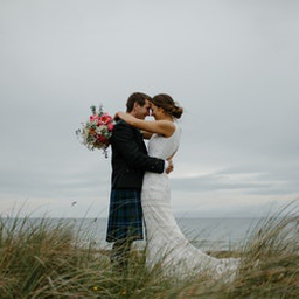

In [5]:
pic = load_img(FILE_2, target_size=(299, 299))  # reload image with new size
pic_array = img_to_array(pic)
display(pic)

In [6]:
expanded = np.expand_dims(pic_array, axis=0)
prediction = inception_model.predict(expanded)  # get the raw prediction's result
decode_predictions(prediction)

[[('n06596364', 'comic_book', 1.0),
  ('n15075141', 'toilet_tissue', 0.0),
  ('n02319095', 'sea_urchin', 0.0),
  ('n02391049', 'zebra', 0.0),
  ('n02389026', 'sorrel', 0.0)]]

You will see that prediciton is very wrong <br>
So there's something wrong <br>
The fact that our data isn't format in the way that our model expected to be

In [7]:
expanded = np.expand_dims(pic_array, axis=0)
preprocessed = preprocess_input(expanded)  # change data to appropiate type 
prediction = inception_model.predict(preprocessed)
decode_predictions(prediction)

[[('n10148035', 'groom', 0.7042386),
  ('n03450230', 'gown', 0.11669549),
  ('n11879895', 'rapeseed', 0.016582683),
  ('n09421951', 'sandbar', 0.012790668),
  ('n03534580', 'hoopskirt', 0.007287771)]]

**Challenge** Create a function that do all job above 

In [8]:
def get_format_img_inceptionresnet(filename=None):
  if filename is None:
    return
  pic = load_img(filename, target_size=(299, 299))  # reload image with new size
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array, axis=0)
  return preprocess_input(expanded)  # change data to appropiate type 

In [9]:
preprocessed = get_format_img_inceptionresnet(filename=FILE_1)
prediction = inception_model.predict(preprocessed)
decode_predictions(prediction)

[[('n04507155', 'umbrella', 0.82924354),
  ('n03792972', 'mountain_tent', 0.001226827),
  ('n04479046', 'trench_coat', 0.0011062956),
  ('n03788195', 'mosque', 0.0010572375),
  ('n03220513', 'dome', 0.0010311006)]]

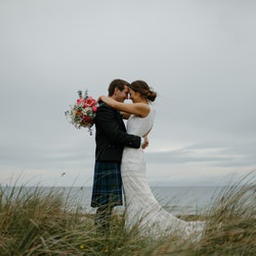

[[('n10148035', 'groom', 0.7042386),
  ('n03450230', 'gown', 0.11669549),
  ('n11879895', 'rapeseed', 0.016582683),
  ('n09421951', 'sandbar', 0.012790668),
  ('n03534580', 'hoopskirt', 0.007287771)]]

In [10]:
prediction = inception_model.predict(get_format_img_inceptionresnet(filename=FILE_2))
display(load_img(FILE_2))
decode_predictions(prediction)

# Testing the VGG19 Model
**Challenge** Use the VGG19 Model from keras with the imagenet weights to make a prediction on several of the smaple images. Load the model into the notebook. Process the data for VGG19. Then make prediction. Look for the documentation for hints.

In [11]:
def get_format_img_vgg19(filename=None):
  if filename is None:
    return
  pic = load_img(filename, target_size=(224, 224))  # reload image with new size
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array, axis=0)
  return preprocess_input_vgg19(expanded)  # change data to appropiate type 

In [12]:
vgg19_model = VGG19()

In [13]:
data = get_format_img_vgg19(FILE_3)
prediction = vgg19_model.predict(data)
decode_predictions_vgg19(prediction)

[[('n04347754', 'submarine', 0.16831148),
  ('n02894605', 'breakwater', 0.12554657),
  ('n03662601', 'lifeboat', 0.09670137),
  ('n09399592', 'promontory', 0.08424033),
  ('n02981792', 'catamaran', 0.08419343)]]

# Testing with another pic

In [14]:
data = get_format_img_vgg19('06 Feet.jpg')
prediction = vgg19_model.predict(data)
decode_predictions_vgg19(prediction)

[[('n07880968', 'burrito', 0.3597473),
  ('n01817953', 'African_grey', 0.09527819),
  ('n03992509', "potter's_wheel", 0.047266223),
  ('n07860988', 'dough', 0.03768624),
  ('n01748264', 'Indian_cobra', 0.026607467)]]

In [15]:
data = get_format_img_inceptionresnet('06 Feet.jpg')
prediction = inception_model.predict(data)
decode_predictions(prediction)

[[('n03188531', 'diaper', 0.09648712),
  ('n03482405', 'hamper', 0.07116319),
  ('n02808304', 'bath_towel', 0.055679817),
  ('n04336792', 'stretcher', 0.05313459),
  ('n02808440', 'bathtub', 0.04509762)]]

In [16]:
data = get_format_img_vgg19('04 Horse.jpg')
prediction = vgg19_model.predict(data)
decode_predictions_vgg19(prediction)

[[('n02412080', 'ram', 0.7342518),
  ('n02415577', 'bighorn', 0.1160941),
  ('n02403003', 'ox', 0.017533273),
  ('n02437616', 'llama', 0.01144305),
  ('n02091134', 'whippet', 0.00935114)]]

In [17]:
data = get_format_img_inceptionresnet('04 Horse.jpg')
prediction = inception_model.predict(data)
decode_predictions(prediction)

[[('n02389026', 'sorrel', 0.4483181),
  ('n02412080', 'ram', 0.02989876),
  ('n02106030', 'collie', 0.01969449),
  ('n04604644', 'worm_fence', 0.016888114),
  ('n04049303', 'rain_barrel', 0.013531395)]]